<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PRACTICA5/P5_Python_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr"></p>

<h1><b>Práctica 5: Introducción al análisis frecuencial de señales
</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Procedimiento</b>

<h4>Los ítems descritos a continuación deben ser desarrollados y entregados por los equipos de trabajo.</h4>

<u><b>Representación de señales</b></u>

Como ejemplo de señal discreta utilizaremos la señal analógica $x_a(t) = Asin(2πF_0t)$ con $F_0 = 40 Hz$ (frecuencia fundamental de la señal), $A = 5V$ (amplitud), y muestreada a $F_s = 1000 Hz$ ($T = 0.001 s$).

El periodo de la señal analógica o en tiempo continuo es $T_p = 0,025 s$, y en tiempo discreto es $N = 25$ (muestras).

La señal $x_1(n)$ se ha generado mediante la pulsación de oscilación en tiempo discreto $f_0 = 0,04 \: muestras/s$. La única diferencia respecto al anterior es que en este último caso el período de muestreo T “manipula” la pulsación original $F_0$ y se considera como eje temporal la sucesión de números enteros correspondiente a los instantes de muestreo. En todo caso, el resultado es el mismo, pues gráficamente se observa que ambas señales $x(t)$ y $x_1(n)$ coinciden, la única diferencia radica en que la evolución de las muestras se escala con la abscisa de tiempo en segundos $t \in \mathbb{R}$ en el primer caso, y con la abscisa de número de muestras $n \in \mathbb{N}$ en el segundo caso.

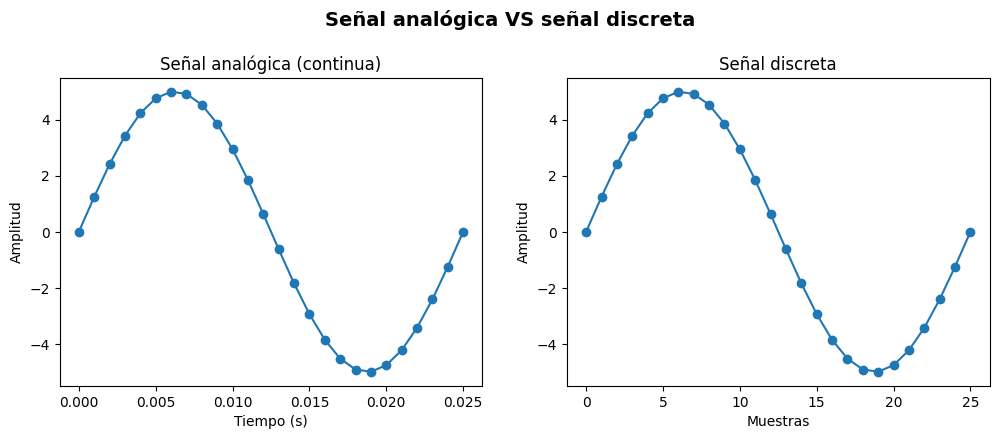

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Señal analógica VS señal discreta', x=0.5, y=1.05, fontsize=14, fontweight='bold')
Fo = 40
Tp = 1/Fo
Fs = 1000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 5
x = A*np.sin(2*np.pi*Fo*t)
axs[0].plot(t, x, marker='o')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Señal analógica (continua)')

fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
axs[1].plot(n, x1, marker='o')
axs[1].set_xlabel('Muestras')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Señal discreta')
plt.show()

<h4><b>a)</b> Compruebe que los valores de las primeras cinco muestras son los mismos.</h4>

Para comprobar que las 5 primeras muestras de $x$ y $x_1$ son idénticas se calculó la resta de los elementos. Las operaciones resultaron en un error de 0, lo que implica que son iguales.

In [2]:
error = x[:5] - x1[:5]
print(f'Error primeras 5 muestras de x y x1: {error}')

Error primeras 5 muestras de x y x1: [0. 0. 0. 0. 0.]


<u><b>Energía y potencia en el dominio del tiempo</b></u>

La energía medida en $V^2$ o $W \cdot s$, la potencia media de la señal medida en $W$, y el valor cuadrático medio es la raíz cuadrada de la potencia, considerando tanto un ciclo de la señal $x(n)$ como 10 ciclos de la sinusoide (250ms), se pueden hallar de la siguiente manera:

In [3]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)

t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)

energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)

<h4><b>b)</b> ¿La potencia es la misma que en $x(n)$? ¿Por qué?</h4>

Para determinar si las potencias son iguales en un ciclo de $x(n)$ o 10 ciclos, se deben restar ambos valores de potencia. La diferencia resulta en un valor despreciable, por lo que se puede concluir que las potencias son iguales.

In [4]:
error_potencia = np.abs(potencia - potencia10)
print(f'Error potencias en 1 ciclo y 10 ciclos: {error_potencia}')

Error potencias en 1 ciclo y 10 ciclos: 3.552713678800501e-15


#<b>Aplicación</b>

<h4>Los ítems descritos a continuación deben ser desarrollados y entregados por los equipos de trabajo. Adjuntar conclusiones y referencias. Recuerde entregar el archivo ipynb, con el desarrollo punto a punto de esta aplicación, incluyendo los enunciados.</h4>

<h4><b>1.</b> Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.</h4>

La frecuencia de muestreo se define apartir de la frecuencia máxima de la señal. En este caso la frecuencia máxima es de 160 Hz, y para representar la señal como una curva con resolución adecuada se toma el cuadrado de esta frecuencia máxima (la resolución óptima se alcanza con una frecuencia de muestreo menor, que se obtiene sumando 5000 al doble de la frecuencia máxima). En cuanto a la frecuencia mínima, se puede determinar como el doble de la frecuencia máxima, sin embargo se obtiene una gráfica con poca definición y se pierde información considerable de la forma de la señal.

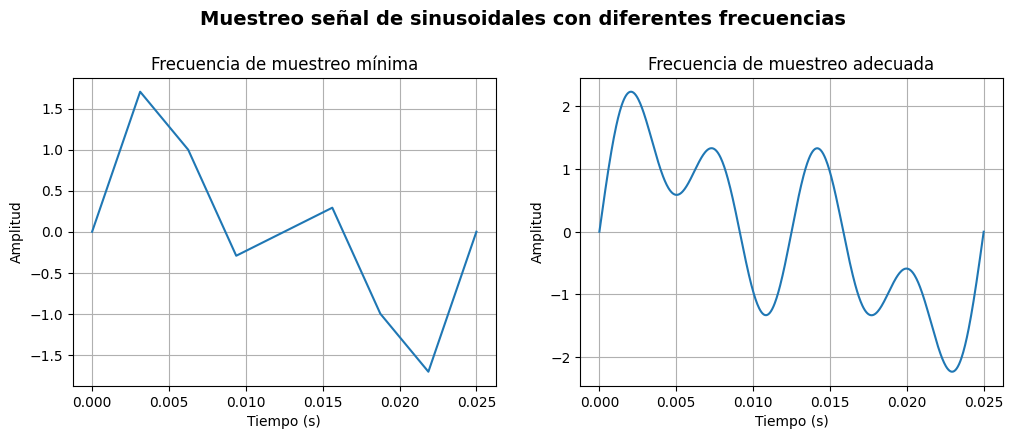

In [5]:
import numpy as np
import matplotlib.pyplot as plt

f = [40, 80, 160]
T_senal = 1/f[0] #El periodo de la señal x se define con la frecuencia menor

#Frecuencia de muestreo mínima
fs_min = max(f)*2
t1 = np.arange(0, T_senal + 1/fs_min, 1/fs_min)

sin_40 = np.sin(2*np.pi*f[0]*t1)
sin_80 = np.sin(2*np.pi*f[1]*t1)
sin_160 = np.sin(2*np.pi*f[2]*t1)
x_fs_min = sin_40 + sin_80 + sin_160

#Frecuencia de muestreo adecuada
fs_adecuada = max(f)**2
t2 = np.arange(0, T_senal + 1/fs_adecuada, 1/fs_adecuada)

sin_40 = np.sin(2*np.pi*f[0]*t2)
sin_80 = np.sin(2*np.pi*f[1]*t2)
sin_160 = np.sin(2*np.pi*f[2]*t2)
x_fs_adecuada = sin_40 + sin_80 + sin_160

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Muestreo señal de sinusoidales con diferentes frecuencias', x=0.5, y=1.05, fontsize=14, fontweight='bold')
axs[0].plot(t1, x_fs_min)
axs[0].set(title='Frecuencia de muestreo mínima', xlabel='Tiempo (s)', ylabel='Amplitud')
axs[0].grid()

axs[1].plot(t2, x_fs_adecuada)
axs[1].set(title='Frecuencia de muestreo adecuada', xlabel='Tiempo (s)', ylabel='Amplitud')
axs[1].grid()
plt.show()

<h4><b>2.</b> Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).</h4>

Para identificar el espectro de frecuencias que conforman la señal se aplica la transformada discreta (con el método de la FFT) a la señal $x(t)$, y se determina la longitud de muestras de la transformada $X$ resultante. A partir del número de muestras se hallan las frecuencias de la transformada con un periodo de muestreo definido con la frecuencia de muestreo adecuada que se determinó en el numeral anterior.

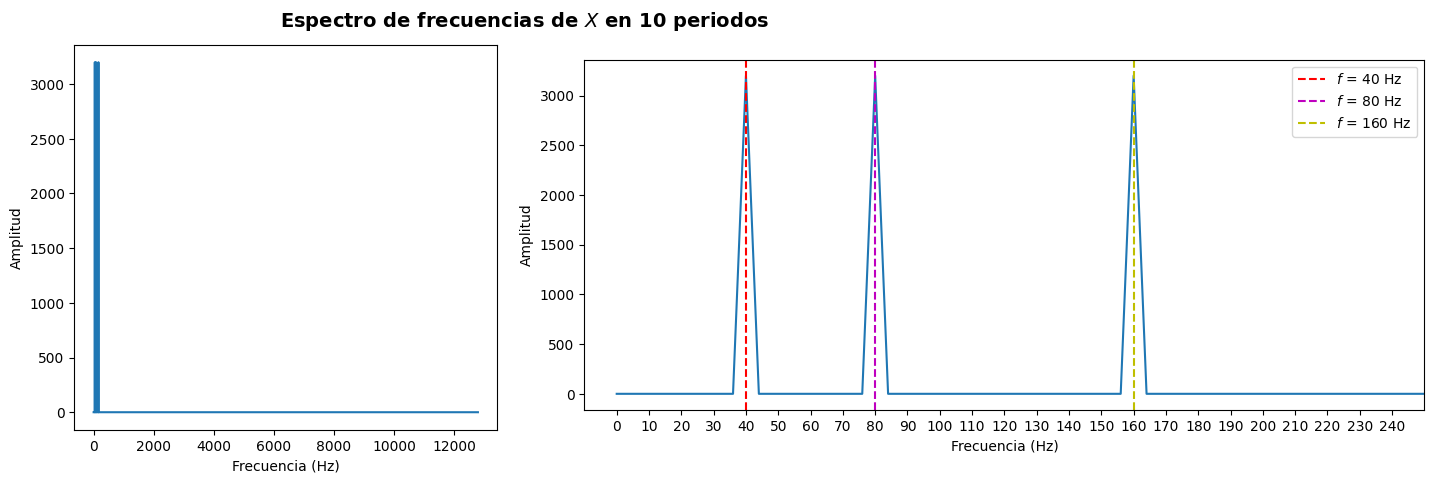

In [6]:
t10 = np.arange(0, 10*T_senal, 1/fs_adecuada) #Tiempo para obtener 10 periodos de la señal
x10 = np.sin(2*np.pi*f[0]*t10) + np.sin(2*np.pi*f[1]*t10) + np.sin(2*np.pi*f[2]*t10)

X = np.fft.fft(x10)
N = len(X)
frequencies = np.fft.fftfreq(N, d=1/fs_adecuada)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Espectro de frecuencias de $X$ en 10 periodos', x=0.5, y=0.95, fontsize=14, fontweight='bold')

axs[0].plot(frequencies[:N//2], np.abs(X)[:N//2]) #Solo se consideran las frecuencias positivas
axs[0].set(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

axs[1].plot(frequencies[:N//2], np.abs(X)[:N//2])
axs[1].set(xlabel='Frecuencia (Hz)', ylabel='Amplitud', xlim=[-10, 250], xticks=np.arange(0, 250, 10), position=[0.55, 0.15, 0.7, 0.7])
axs[1].axvline(f[0], color='r', linestyle='--', label=f'$f$ = {f[0]} Hz')
axs[1].axvline(f[1], color='m', linestyle='--', label=f'$f$ = {f[1]} Hz')
axs[1].axvline(f[2], color='y', linestyle='--', label=f'$f$ = {f[2]} Hz')
axs[1].legend()
plt.show()

<h4><b>3.</b> Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.</h4>

Una función que permite calcular la transformada inversa de Fourier de una señal discreta es la función <i>np.fft.ifft()</i>, la cual recibe como argumento la función discreta y retorna la función continua.

Se calculó la transformada inversa de $X$ y se comparó graficamente con la señal continuo original en 10 periodos de tiempo.

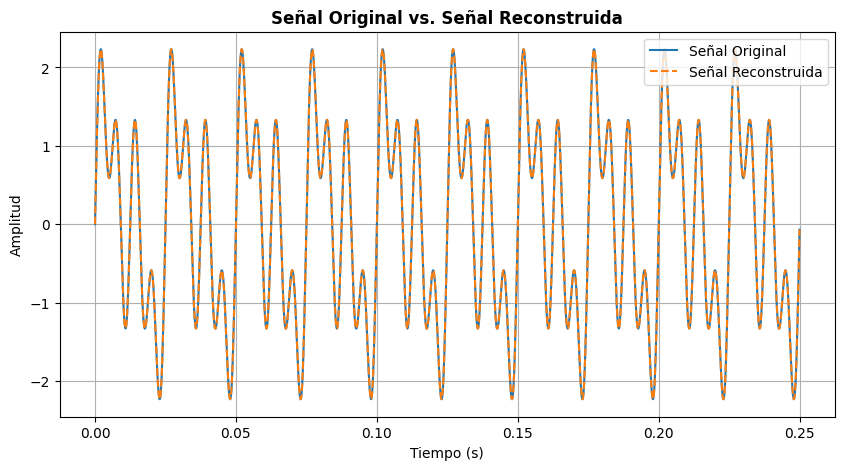

In [7]:
x_continua = np.fft.ifft(X)

plt.figure(figsize=(10, 5))
plt.plot(t10, x10, label='Señal Original')
plt.plot(t10, x_continua.real, linestyle='--', label='Señal Reconstruida')
plt.title('Señal Original vs. Señal Reconstruida', fontweight='bold')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

<h4><b>4.</b> ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?</h4>

```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```
<h4>Extraiga de manera similar cada una de las componentes de la señal.</h4>

El código presentado en el enunciado sí aplica un filtro. Se implementa un filtrado manual de componentes de frecuencia de la transformada $F1$ al seccionar el vector entre los índices 9 y 13, lo cual cuenta como filtrado al eliminar frecuencias de la señal.

Para extraer las componentes de frecuencia de la señal del numeral anterior, se deben identificar los índices de cada frecuencia del espectro. Posteriormente, se asigna a un vector de ceros el valor de la transformada en la frecuencia que se desea conservar, y finalmente se aplica la transformada inversa para reconstruir la señal sinusoidal solo con el componente de frecuencia seleccionado.

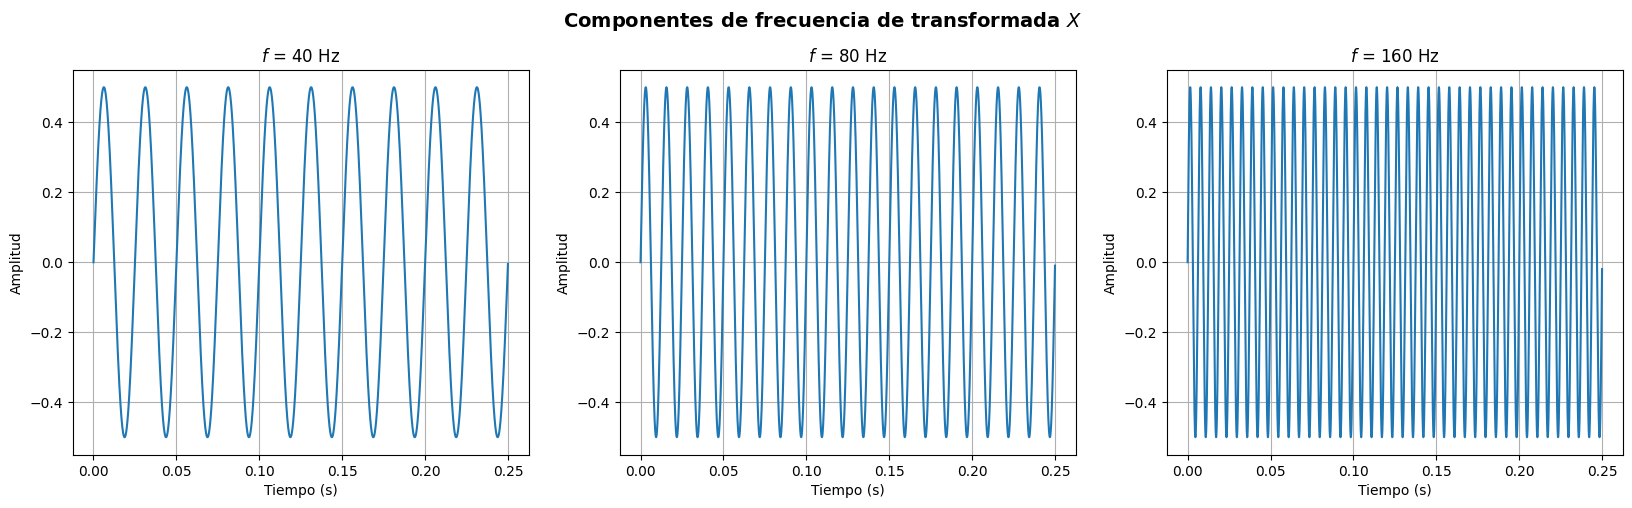

In [8]:
F_40, F_80, F_160 = [np.zeros(len(X), dtype=complex) for _ in range(3)]

index_40 = np.where(frequencies == f[0])[0][0]
index_80 = np.where(frequencies == f[1])[0][0]
index_160 = np.where(frequencies == f[2])[0][0]

F_40[index_40] = X[index_40]
F_80[index_80] = X[index_80]
F_160[index_160] = X[index_160]

xr_40 = np.fft.ifft(F_40)
xr_80 = np.fft.ifft(F_80)
xr_160 = np.fft.ifft(F_160)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Componentes de frecuencia de transformada $X$', x=0.5, y=1, fontsize=14, fontweight='bold')

axs[0].plot(t10, np.real(xr_40))
axs[0].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='$f$ = 40 Hz')
axs[0].grid()

axs[1].plot(t10, np.real(xr_80))
axs[1].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='$f$ = 80 Hz')
axs[1].grid()

axs[2].plot(t10, np.real(xr_160))
axs[2].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='$f$ = 160 Hz')
axs[2].grid()
plt.show()

<h4><b>5.</b> El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma usando una ventana Hanning. Justificar la elección del solapamiento y el ancho de la ventana.</h4>

En primer lugar, se importa el archivo <i>senecg.mat</i> desde el repositorio del grupo de laboratorio.

In [9]:
!git clone https://github.com/marianayarce1224/lab_biosenales.git

Cloning into 'lab_biosenales'...
remote: Enumerating objects: 493, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 493 (delta 88), reused 22 (delta 22), pack-reused 367 (from 1)
Receiving objects: 100% (493/493), 692.29 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (163/163), done.
Updating files: 100% (24/24), done.


In [10]:
%cd /content/lab_biosenales/PRACTICA5

/content/lab_biosenales/PRACTICA5


In [11]:
%ls

C049_EP_reposo.mat  P049_EP_reposo.mat  P5_Python_G3.ipynb  senecg.mat


Se cargan los valores del archivo y se grafica la señal original, teniendo en cuenta la frecuencia de muestreo del enunciado.

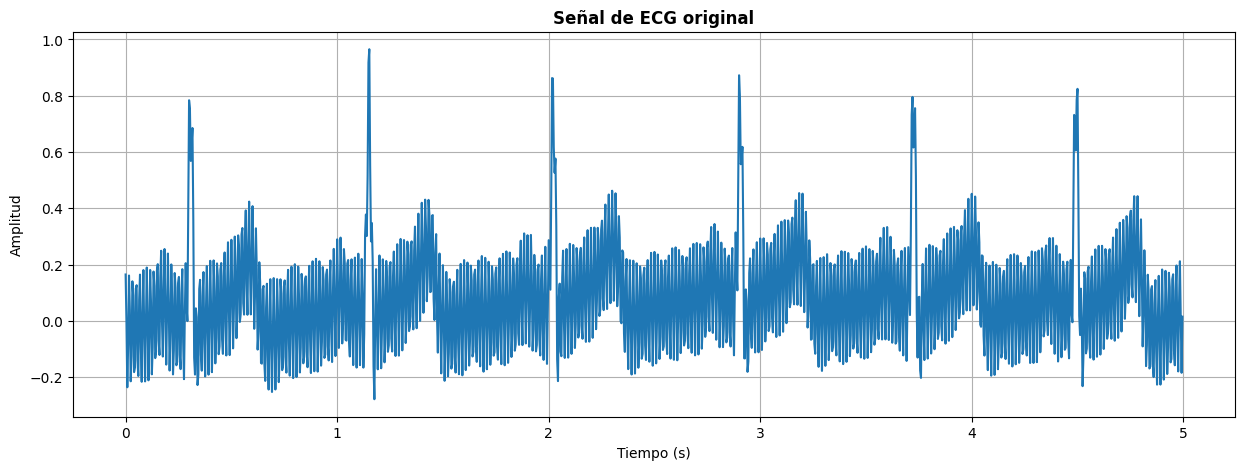

In [12]:
import scipy.io

file_path = '/content/lab_biosenales/PRACTICA5/senecg.mat'
data = scipy.io.loadmat(file_path)
ecg_signal = data['ECG'].flatten()
fs = 250

plt.figure(figsize=(15, 5))
time = np.arange(len(ecg_signal))/fs  #Generar el vector de tiempo
plt.plot(time, ecg_signal)
plt.title('Señal de ECG original', fontweight='bold')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

<b>Periodograma de Welch</b><br>
El periodograma de Welch sirve para determinar la Densidad de Potencia Espectral (PSD) promedio de una señal, a través de la estimación con los periodogramas individuales de sus componentes de frecuencia.

Para determinar el periodograma de Welch, se implementa una función de ```scipy.signal``` que recibe como argumentos la señal de ECG, la frecuencia de muestreo y el ancho de ventana. Inicialmente se define el ancho de ventana (nperseg) en 1024 para obtener una resolución de frecuencia nítida y poder diferenciar con exactitud los picos en las frecuencias. Se pueden establecer más argumentos para aplicar un periodograma más específico, pero por simplicidad solo se definen los parámetros mencionados.



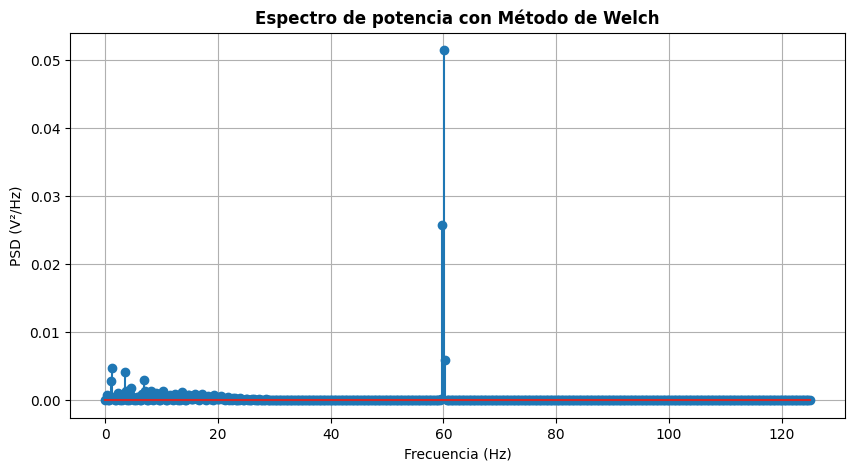

In [13]:
from scipy.signal import welch

frequencies, psd = welch(ecg_signal, fs, nperseg=1024)

plt.figure(figsize=(10, 5))
plt.stem(frequencies, psd)
plt.title('Espectro de potencia con Método de Welch', fontweight='bold')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (V²/Hz)')
plt.grid()
plt.show()

En el gráfico del periodograma se observa un pico alrededor de los 60 Hz, lo que implica que la señal contiene ruido (posiblemente de la red eléctrica, que se introdujo por los implementos electrónicos al hacer la medición de la señal). Por lo tanto, es necesario aplicar un filtrado de la señal para eliminar la componente de frecuencia del ruido.

Para implementar el filtrado, se empezó por identificar los índices de las frecuencias en un rango de 60 a 61 Hz para la transformada de la señal ECG. Posteriormente, se reemplazaron los valores de la transformada en dichas posiciones por el valor mínimo de la señal. Al calcular nuevamente el periodograma de Welch con el método de ventana de Hanning, un ancho de ventana (nperseg) de 500, y un solapamiento (noverlap) de . Para seleccionar el valor del ancho de ventana se tuvo en cuenta la resolución de frecuencia adecuada para la señal ECG; el rango de frecuencias de ECG se encuentra aproximadamente entre 0.5 Hz y 150 Hz <b>[1]</b>, entonces el ancho de ventana se calcula de la siguiente manera:

<h4>$nperseg = \frac{f_s}{f_{min \: ECG}} = \frac{250}{0.5}=500$</h4>

Por otro lado, el solapamiento se establece como el 50% del ancho de ventana según lo usado comúnmente con señales biológicas para obtener una densidad de potencia más exacta y mantener la continuidad de la señal entre segmentos de ventana.

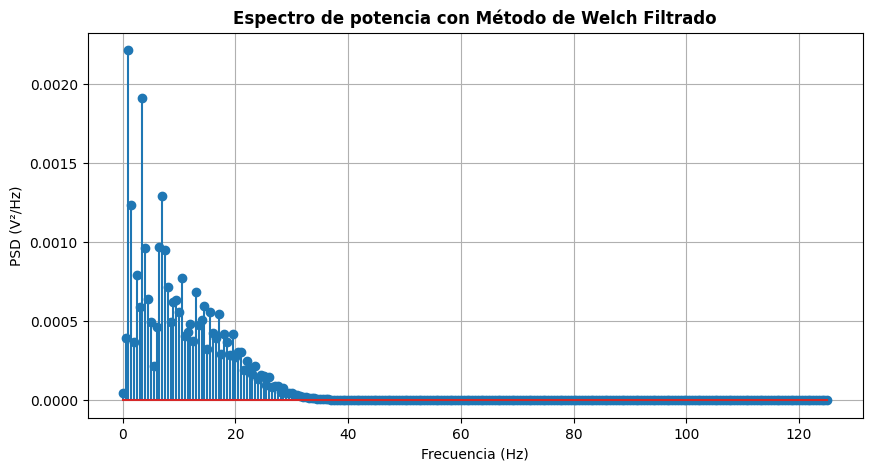

In [14]:
freqs = np.fft.fftfreq(len(ecg_signal), 1/fs)
ECG = np.fft.fft(ecg_signal)

noise_index = (np.abs(freqs) >= 60) & (np.abs(freqs) < 61)
ECG[noise_index] = min(ecg_signal)

ECG_filtered = np.fft.ifft(ECG)# transformada inversa

nperseg = 500
noverlap = nperseg // 2
f_denoised, psd_denoised = welch(np.real(ECG_filtered), fs, nperseg=nperseg, window='hann', noverlap=noverlap)

plt.figure(figsize=(10, 5))
plt.stem(f_denoised, psd_denoised)
plt.title('Espectro de potencia con Método de Welch Filtrado', fontweight='bold')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (V²/Hz)')
plt.grid()
plt.show()

Se puede observar que se ha filtrado el ruido de 60 Hz que se presentó inicialmente en el periodograma. Como es de esperarse de una señal ECG, se observa que la mayor parte de la potencia de la señal está concentrada en las frecuencias por debajo de los 40 Hz.

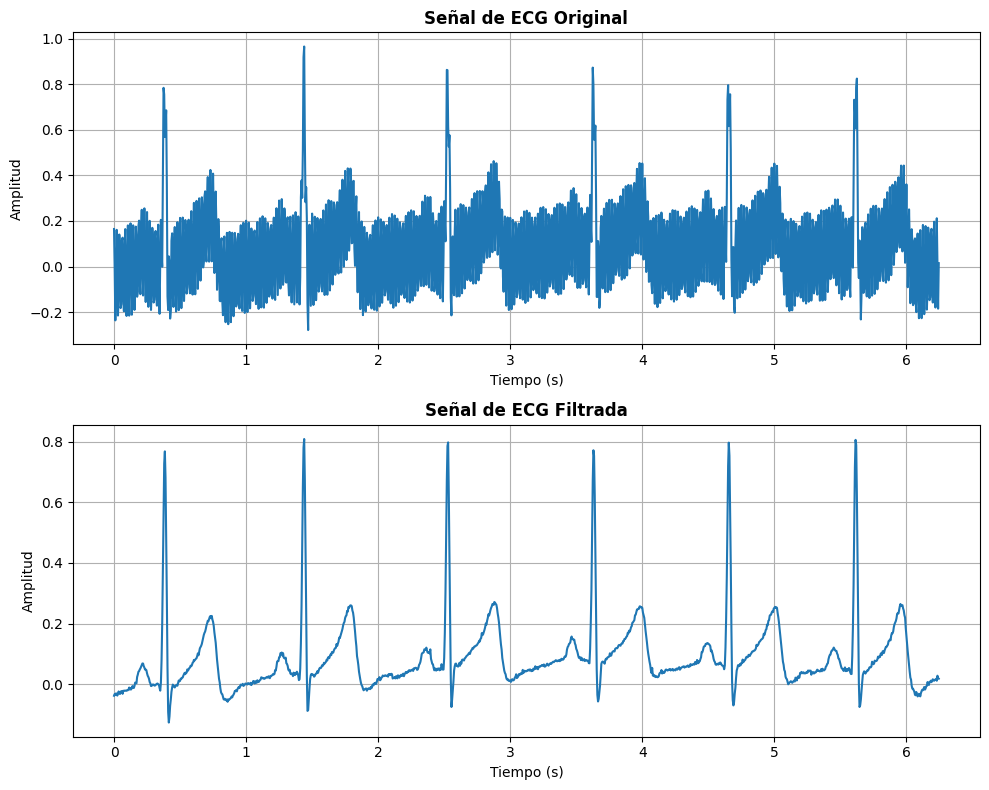

In [20]:
time = np.arange(len(ecg_signal)) / fs

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(time, ecg_signal)
plt.title('Señal de ECG Original', fontweight='bold')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, np.real(ECG_filtered))
plt.title('Señal de ECG Filtrada', fontweight='bold')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.tight_layout()
plt.show()

Luego del filtrado, la señal muestra las características principales del ECG de manera clara. Las ondas P, los complejos QRS y las ondas T son mucho más visibles, indicando que el proceso de eliminación de la interferencia de 60 Hz ha sido exitoso. Además, la señal es más suave y limpia, lo que facilita la identificación de las componentes fisiológicas.

<h4><b>6.</b> Realice un análisis de frecuencia a través del periodograma de Welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning y justificar la elección del solapamiento y el ancho de la ventana)</h4>

Para el análisis de frecuencias de un paciente Sano y otro con Parkinson se seleccionaron archivos .mat de EEG trabajados en la Práctica 3. Se escogió un paciente al azar de cada población y se trabajó el canal 3 correspondiente a CZ, debido a que este mostró un valor p para la Prueba U de Mann-Whitney medio en comparación con otros canales con valores mayores que implicaban una mayor certeza de que las medias de las poblaciones no presentaban diferencias significativas.




In [16]:
import scipy.io as sio;
data_control = sio.loadmat('/content/lab_biosenales/PRACTICA5/C049_EP_reposo.mat')

data_parkinson = sio.loadmat('/content/lab_biosenales/PRACTICA5/P049_EP_reposo.mat')

# Se extraen las señales de los sujetos
signal_control = data_control['data']
signal_parkinson = data_parkinson['data']

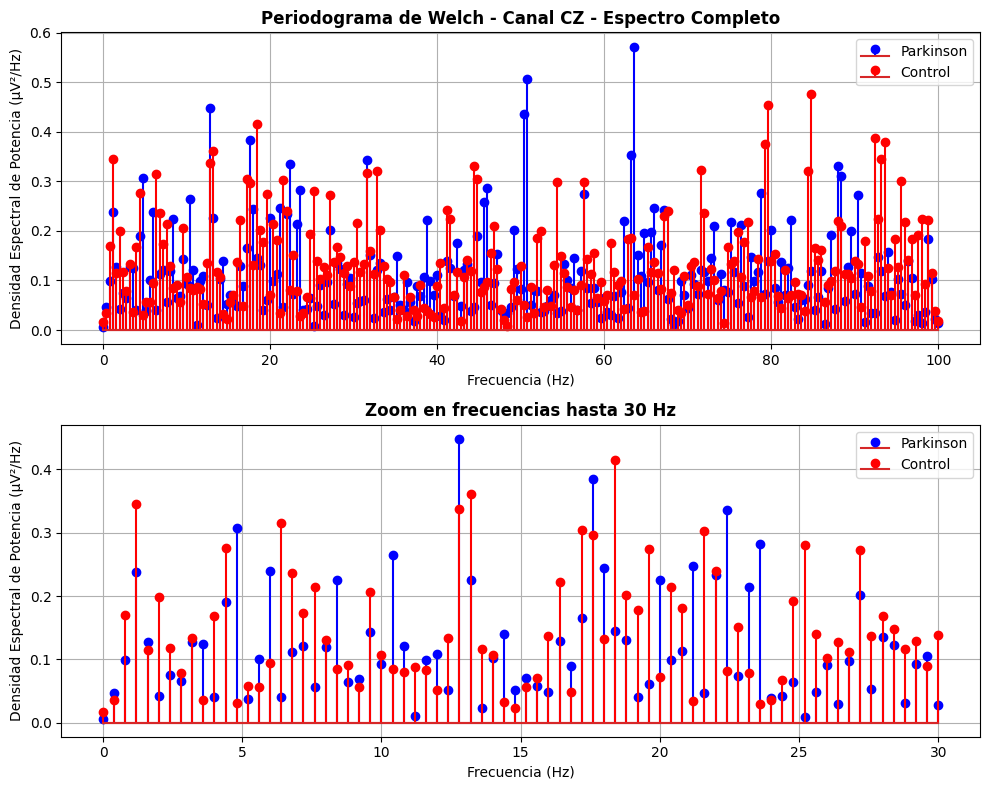

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def analisis_espectral_welch_eeg(signal_parkinson, signal_control, canal=2, fs=200):
    parkinson_ch = signal_parkinson[:, canal].flatten()
    control_ch = signal_control[:, canal].flatten()

    parkinson_ch = parkinson_ch - np.mean(parkinson_ch)
    control_ch = control_ch - np.mean(control_ch)
    nperseg = 500
    noverlap = nperseg // 2
    f_parkinson, Pxx_parkinson = signal.welch(parkinson_ch, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap, scaling='density')

    f_control, Pxx_control = signal.welch(control_ch, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap, scaling='density')

    plt.figure(figsize=(10, 8))
    plt.subplot(211)
    plt.stem(f_parkinson, Pxx_parkinson, 'b', label='Parkinson')
    plt.stem(f_control, Pxx_control, 'r', label='Control')
    plt.grid()
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Densidad Espectral de Potencia (µV²/Hz)')
    plt.title(f'Periodograma de Welch - Canal CZ - Espectro Completo', fontweight='bold')
    plt.legend()

    # Plot con zoom en las frecuencias hasta 30 Hz
    plt.subplot(212)
    mask = f_parkinson <= 30
    plt.stem(f_parkinson[mask], Pxx_parkinson[mask], 'b', label='Parkinson')
    plt.stem(f_control[mask], Pxx_control[mask], 'r', label='Control')
    plt.grid()
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Densidad Espectral de Potencia (µV²/Hz)')
    plt.title('Zoom en frecuencias hasta 30 Hz', fontweight='bold')
    plt.legend()

    plt.tight_layout()

analisis_espectral_welch_eeg(signal_parkinson, signal_control, canal=1)  # Canal 2 (0-based indexing)

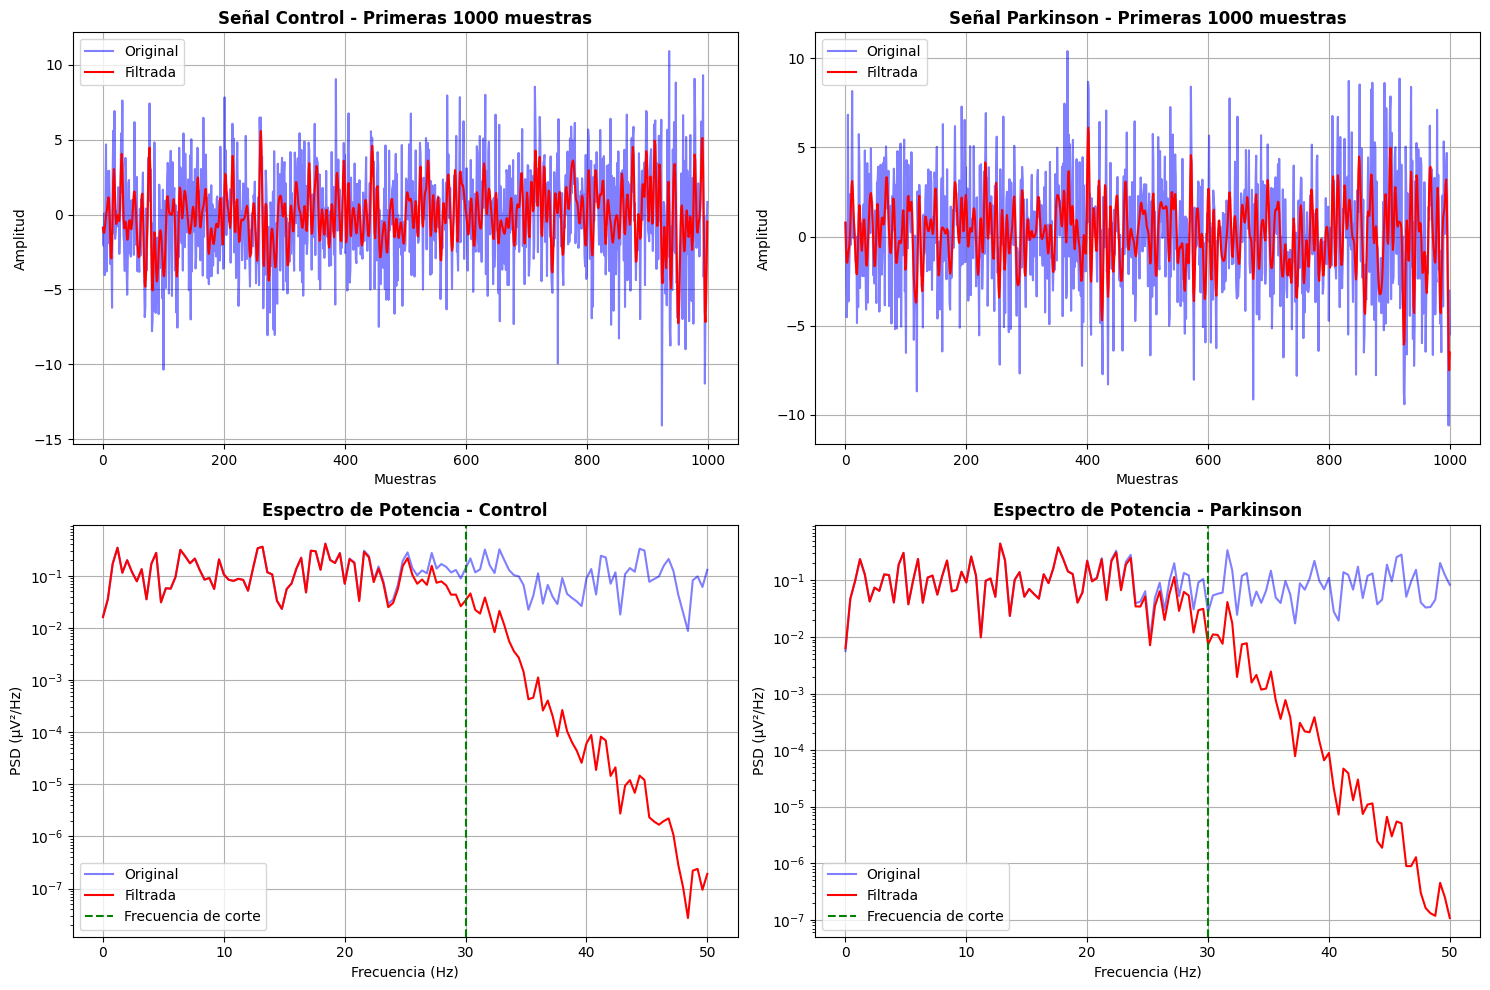

In [18]:
from scipy.signal import welch, butter, filtfilt

fs = 200
canal = 2
fc = 30

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

control_signal = signal_control[:, canal].flatten()
parkinson_signal = signal_parkinson[:, canal].flatten()

control_filtered = apply_lowpass_filter(control_signal, fc, fs)
parkinson_filtered = apply_lowpass_filter(parkinson_signal, fc, fs)

nperseg = 500
noverlap = nperseg // 2

# Análisis espectral de señales originales y filtradas
f_control_orig, psd_control_orig = welch(control_signal, fs, nperseg=nperseg,
                                       window='hann', noverlap=noverlap)
f_parkinson_orig, psd_parkinson_orig = welch(parkinson_signal, fs, nperseg=nperseg,
                                            window='hann', noverlap=noverlap)

f_control_filt, psd_control_filt = welch(control_filtered, fs, nperseg=nperseg,
                                        window='hann', noverlap=noverlap)
f_parkinson_filt, psd_parkinson_filt = welch(parkinson_filtered, fs, nperseg=nperseg,
                                            window='hann', noverlap=noverlap)

# Visualización
plt.figure(figsize=(15, 10))

# Señales en tiempo
plt.subplot(221)
plt.plot(control_signal[:1000], 'b', label='Original', alpha=0.5)
plt.plot(control_filtered[:1000], 'r', label='Filtrada')
plt.title('Señal Control - Primeras 1000 muestras', fontweight='bold')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(222)
plt.plot(parkinson_signal[:1000], 'b', label='Original', alpha=0.5)
plt.plot(parkinson_filtered[:1000], 'r', label='Filtrada')
plt.title('Señal Parkinson - Primeras 1000 muestras', fontweight='bold')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Espectros de potencia
plt.subplot(223)
mask_orig = f_control_orig <= 50  # Mostrar hasta 50 Hz para mejor visualización
plt.semilogy(f_control_orig[mask_orig], psd_control_orig[mask_orig], 'b',
             label='Original', alpha=0.5)
plt.semilogy(f_control_filt[mask_orig], psd_control_filt[mask_orig], 'r',
             label='Filtrada')
plt.axvline(x=30, color='g', linestyle='--', label='Frecuencia de corte')
plt.title('Espectro de Potencia - Control', fontweight='bold')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (µV²/Hz)')
plt.grid(True)
plt.legend()

plt.subplot(224)
plt.semilogy(f_parkinson_orig[mask_orig], psd_parkinson_orig[mask_orig], 'b',
             label='Original', alpha=0.5)
plt.semilogy(f_parkinson_filt[mask_orig], psd_parkinson_filt[mask_orig], 'r',
             label='Filtrada')
plt.axvline(x=30, color='g', linestyle='--', label='Frecuencia de corte')
plt.title('Espectro de Potencia - Parkinson', fontweight='bold')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (µV²/Hz)')
plt.grid(True)
plt.legend()

plt.tight_layout()





Se puede observar que para ambos sujetos(paciente sano y paciente con parkinson), la señal EEG sin filtrar tiene componentes de alta frecuencia y tiene más ruido ,  lo que es usual en señales EEG crudas debido a la presencia de artefactos y ruido eléctrico. El filtrado ha eliminado componentes de alta frecuencia con filtro pasabajas en ambas señales (control y Parkinson), mostrando una señal más suave y más representativa de la actividad cerebral real, donde se conservan las frecuencias más bajas que son más relevantes para el análisis de EEG.
La señal filtrada del paciente con Parkinson parece tener componentes de baja frecuencia más pronunciados, lo que puede estar relacionado con patrones anormales de actividad cerebral asociados a la enfermedad de Parkinson.

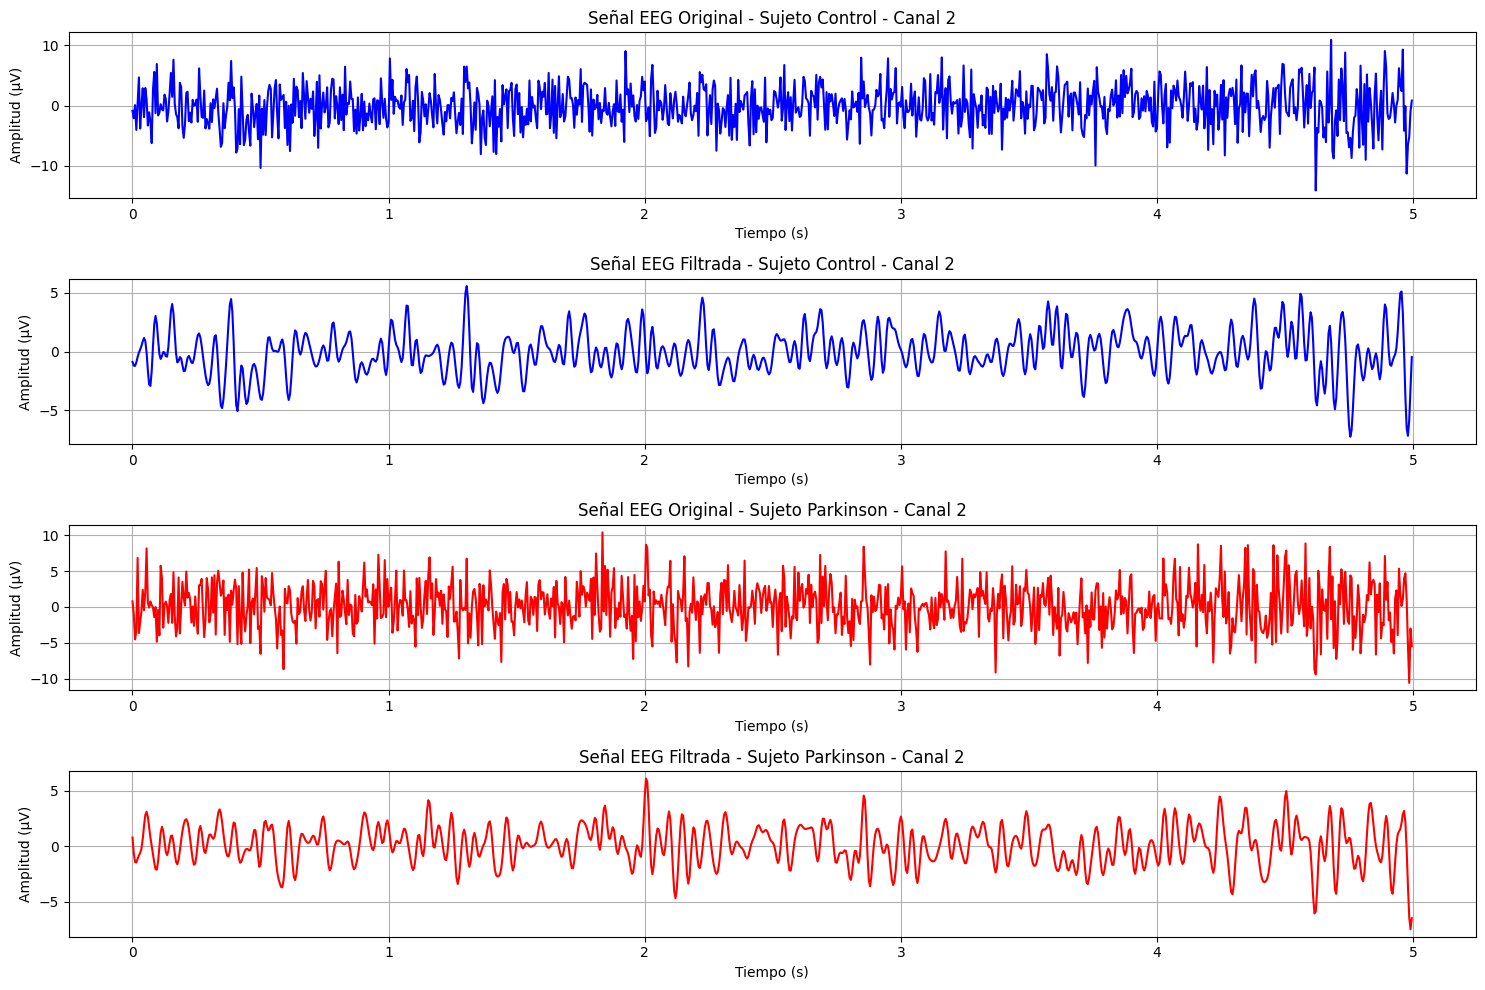

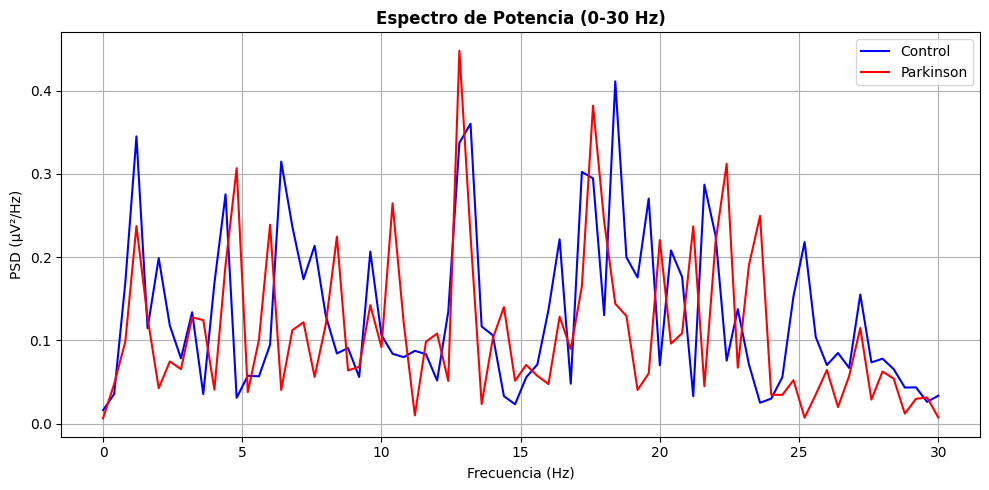

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt

# Parámetros
fs = 200  # Frecuencia de muestreo en Hz
canal = 1
fc = 30  # Frecuencia de corte en Hz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Extraer señales del canal seleccionado
control_signal = signal_control[:, canal].flatten()
parkinson_signal = signal_parkinson[:, canal].flatten()

# Aplicar filtro paso bajo
control_filtered = apply_lowpass_filter(control_signal, fc, fs)
parkinson_filtered = apply_lowpass_filter(parkinson_signal, fc, fs)

# Definir la cantidad de muestras para graficar (por ejemplo, primeros 5 segundos)
muestras_5seg = 5 * fs
tiempo = np.arange(muestras_5seg) / fs

# Crear figura para graficar las señales originales y filtradas
plt.figure(figsize=(15, 10))

# 1. Señal original del sujeto Control
plt.subplot(4, 1, 1)
plt.plot(tiempo, control_signal[:muestras_5seg], 'b', label='Original Control')
plt.title('Señal EEG Original - Sujeto Control - Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.grid(True)

# 2. Señal filtrada del sujeto Control
plt.subplot(4, 1, 2)
plt.plot(tiempo, control_filtered[:muestras_5seg], 'b', label='Filtrada Control')
plt.title('Señal EEG Filtrada - Sujeto Control - Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.grid(True)

# 3. Señal original del sujeto Parkinson
plt.subplot(4, 1, 3)
plt.plot(tiempo, parkinson_signal[:muestras_5seg], 'r', label='Original Parkinson')
plt.title('Señal EEG Original - Sujeto Parkinson - Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.grid(True)

# 4. Señal filtrada del sujeto Parkinson
plt.subplot(4, 1, 4)
plt.plot(tiempo, parkinson_filtered[:muestras_5seg], 'r', label='Filtrada Parkinson')
plt.title('Señal EEG Filtrada - Sujeto Parkinson - Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (µV)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Cálculo del periodograma de Welch para ambas señales
nperseg = 500
noverlap = nperseg // 2

# Periodograma para la señal filtrada del sujeto Control
f_control_filt, psd_control_filt = welch(control_filtered, fs, nperseg=nperseg, window='hann', noverlap=noverlap)
# Periodograma para la señal filtrada del sujeto Parkinson
f_parkinson_filt, psd_parkinson_filt = welch(parkinson_filtered, fs, nperseg=nperseg, window='hann', noverlap=noverlap)
mask = f_control_filt <= 30

# Graficar espectro de potencia
plt.figure(figsize=(10, 5))
plt.plot(f_control_filt[mask], psd_control_filt[mask], 'b', label='Control')
plt.plot(f_parkinson_filt[mask], psd_parkinson_filt[mask], 'r', label='Parkinson')
plt.title('Espectro de Potencia (0-30 Hz)', fontweight='bold')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (µV²/Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



En el espectro de Potencia de las señales filtradas, las diferencias entre ambas señales parkinson y pacientes sanos se hacen más evidentes. El espectro de los pacientes de parkinson maneja una menor densidad espectral que en los pacientes sanos, lo cual es coherente con estudios  sobre señales EEG de pacientes con Parkinson. La enfermedad de Parkinson está asociada con disfunciones en el control motor y puede afectar la sincronización neuronal. Esto puede manifestarse como una reducción en la potencia de las bandas de frecuencias más altas (alfa y beta), que están asociadas con la actividad motora y cognitiva.[2]
1.   Bandas beta (13-30 Hz): En sujetos sanos, las bandas beta están asociadas con actividad motora y concentración. La reducción de la actividad beta en pacientes con Parkinson se ha reportado ampliamente, especialmente en el contexto de disfunciones motoras.
2.   Bandas alfa (8-12 Hz): También pueden mostrar una reducción en los pacientes con Parkinson, lo que está relacionado con alteraciones en la comunicación cerebral y en procesos cognitivos.[3]

 En sujetos sanos, se espera una mayor potencia en los rangos alfa y beta, ya que estas bandas están relacionadas con una actividad cerebral normal y eficiente. La mayor densidad espectral significa que hay una mayor sincronización neuronal y una mejor comunicación entre las diferentes áreas del cerebro.








##<b>Conclusiones</b>




*   Según el filtrado de la señal ECG se puede decir que  el filtrado por periodograma de welch es  efectivo para eliminar  interferencias de ruido eélctrico sin perder información relevante de señal fisiológica, lo cual permite una mejor visualización de los componentes fisiológicamente relevantes: las ondas P, QRS y T, que son esenciales para el diagnóstico cardiaco.

*   El análisis y procesamiento de señales biomédicas, como las señales ECG, utilizando herramientas como el filtrado y el periodograma de Welch, permiten una mejor interpretación de los datos.


*   El proceso de filtrado es crucial para mejorar la calidad de las señales biomédicas. En el caso de las señales EEG, el filtrado ayuda a eliminar las componentes de alta frecuencia, lo que permite centrarse en las frecuencias más relevantes para el análisis neurológico. Esto es especialmente útil cuando se comparan poblaciones sanas con aquellas afectadas por trastornos como el Parkinson.

*  El espectro de potencia revela patrones importantes sobre cómo las enfermedades afectan la actividad cerebral. En el caso de pacientes con Parkinson, el aumento de actividad en frecuencias bajas puede estar relacionado con disfunciones en la sincronización neuronal, que son características de la enfermedad. Esto nos permite vincular patrones de frecuencia con síntomas clínicos como las alteraciones motoras.

*   El análisis de las señales ECG y EEG ha demostrado la importancia de aplicar técnicas de filtrado y análisis espectral para obtener información significativa, el tratamiento de las señales ECG y EEG resalta la importancia  herramientas de procesamiento de señales para mejorar la comprensión fisiológica de las señales, sino que también tiene aplicaciones cruciales en la detección temprana y el seguimiento de enfermedades.





##<b>Referencias</b>

<b>[1]:</b> GE Healthcare. (2023, Agosto 2). <i>A guide to ECG signal filtering</i>. GE HealthCare. https://www.gehealthcare.com/insights/article/a-guide-to-ecg-signal-filtering

<b>[2]:</b> A. Schnitzler, J. Gross, "Normal and pathological oscillatory communication in the brain," Nature Reviews Neuroscience, vol. 6, no. 4, pp. 285-296, Apr. 2005.

<b>[3]:</b> M. R. Naismith, S. Lewis, and S. E. K. Rogers, "Changes in EEG Alpha Oscillations Following Dopaminergic Stimulation in Parkinson’s Disease," Movement Disorders, vol. 25, no. 3, pp. 397-405, Mar. 2010.
